# Pre-processing

In [341]:
import pandas as pd
import numpy as np

<h4> โหลดชุดข้อมูล </h4>

In [342]:
data_sets = pd.read_csv('./cow.csv')

In [343]:
data_sets.columns

Index(['surgery', 'age', 'hospital_number', 'temperature', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome Class', 'surgical_lesion', 'lesion'],
      dtype='object')

In [344]:
data_sets.shape

(299, 25)

In [345]:
data_sets['outcome Class'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome Class, dtype: int64

<h4> จัดการค่า NaN และ map input ให้เป็นตัวเลข </h4>

In [346]:
feture_cols = ['surgery', 
               'age', 
               'temperature', 
               'pulse', 
               'respiratory_rate', 
               'temp_of_extremities', 
               'peripheral_pulse', 
               'mucous_membrane', 
               'capillary_refill_time',
               'pain',
               'peristalsis',
               'abdominal_distention',
               'nasogastric_tube',
               'nasogastric_reflux',
               'rectal_exam_feces',
               'abdomen',
               'packed_cell_volume', 
               'total_protein', 
               'abdomo_appearance',
               'abdomo_protein',
               'surgical_lesion',
               'lesion', 
               'outcome Class']

In [347]:
df = data_sets[feture_cols].copy()
df.surgery = df.surgery.map({
    'no' : 0, 
    'yes' : 1
    })
df.age = df.age.map({
    'young' : 0, 
    'adult' : 1
    })
df.loc[df.temperature.isnull(), 'temperature'] = 37.8
df.loc[df.pulse.isnull(), 'pulse'] = int(np.random.randint(30, 40, size=1)) 
df.loc[df.respiratory_rate.isnull(), 'respiratory_rate'] = int(np.random.randint(8, 10, size=1)) 
df.temp_of_extremities = df.temp_of_extremities.map({
    'normal':0, 
    'warm':1, 
    'cool' : 2, 
    'cold' : 3,
    np.nan : 0,
    })
df.mucous_membrane = df.mucous_membrane.map({
    'normal_pink': 1, 
    'bright_pink': 2, 
    'pale_pink': 3,
    'pale_cyanotic':4, 
    'bright_red': 5, 
    'dark_cyanotic': 6,
    np.nan : 1
    })
df.peripheral_pulse = df.peripheral_pulse.map({
    'normal' : 1, 
    'increased' : 2, 
    'reduced' : 3, 
    'absent' : 4,
    np.nan : 1
    })
df.capillary_refill_time = df.capillary_refill_time.map({
    'less_3_sec' : 1,
    'more_3_sec' : 2,
    '3' : 2,
    np.nan : 1
})
df.pain = df.pain.map({
    'alert' : 1,
    'depressed' : 2,
    'extreme_pain' : 3,
    'mild_pain' : 4,
    'severe_pain' : 5,
    np.nan : 0
})
df.peristalsis = df.peristalsis.map({
    'hypermotile' : 1,
    'normal' : 2,
    'hypomotile' : 3,
    'absent' : 4,
    np.nan : 2
})
df.abdominal_distention = df.abdominal_distention.map({
    'none' : 1,
    'slight' : 2,
    'moderate' : 3,
    'severe' : 4,
    np.nan : 1
})
df.nasogastric_tube = df.nasogastric_tube.map({
    'none' : 1,
    'slight' : 2,
    'significant' : 3,
    np.nan : 1
})
df.nasogastric_reflux = df.nasogastric_reflux.map({
    'none' : 1,
    'more_1_liter' : 2,
    'less_1_liter' : 3,
    np.nan : 1
})
df.rectal_exam_feces = df.rectal_exam_feces.map({
    'normal' : 1,
    'increased' : 2,
    'decreased' : 3,
    'absent' : 4,
    np.nan : 1
})
df.abdomen = df.abdomen.map({
    'normal' : 1,
    'other' : 2,
    'firm' : 3,
    'distend_small' : 4,
    'distend_large' : 5,
    np.nan : 1
})
df.loc[df.packed_cell_volume.isnull(), 'packed_cell_volume'] = int(np.random.randint(30, 50, size=1)) 
df.loc[df.total_protein.isnull(), 'total_protein'] = float((7.5 - 6) * np.random.random_sample(1) + 6)
df.abdomo_appearance = df.abdomo_appearance.map({
    'clear' : 1,
    'cloudy' : 2,
    'serosanguious' : 3,
    np.nan : 1
})
df.loc[df.abdomo_protein.isnull(), 'abdomo_protein'] = 3
df.surgical_lesion = df.surgical_lesion.map({
    'yes' : 1,
    'no' : 2
})

# df = df.drop(df[df.isnull().sum(axis=1) > 0].index)

In [348]:
# check NaN
[df.isnull().sum(axis=0) > 0]

[surgery                  False
 age                      False
 temperature              False
 pulse                    False
 respiratory_rate         False
 temp_of_extremities      False
 peripheral_pulse         False
 mucous_membrane          False
 capillary_refill_time    False
 pain                     False
 peristalsis              False
 abdominal_distention     False
 nasogastric_tube         False
 nasogastric_reflux       False
 rectal_exam_feces        False
 abdomen                  False
 packed_cell_volume       False
 total_protein            False
 abdomo_appearance        False
 abdomo_protein           False
 surgical_lesion          False
 lesion                   False
 outcome Class            False
 dtype: bool]

In [349]:
[i for i in np.array(data_sets.columns) if i not in np.array(feture_cols)]

['hospital_number', 'nasogastric_reflux_ph']

In [350]:
df['outcome Class'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome Class, dtype: int64

In [351]:
X = df
y = X['outcome Class'].values
X = X.drop(['outcome Class'], axis=1)

In [352]:
classes = ['lived', 'died', 'euthanized']

In [353]:
y[y=='lived'] = 1
y[y=='died'] = 2
y[y=='euthanized'] = 3
y = y.astype('int')

# แยกข้อมูลฝึก/ทดสอบ

In [354]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [355]:
y_train = y_train.astype('int')

# Function

In [356]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plotCM(y_test, y_pred, labels, size=(5,5)):

    confusion_matrix = metrics.confusion_matrix(y_pred, y_test) # invert exis from test, pred to pred test
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = labels,)
    fig, ax = plt.subplots(figsize=size)
    cm_display.plot(ax=ax, xticks_rotation='vertical')
    # invert exis x,y
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [357]:
from sklearn.metrics import classification_report

def report(y_true, y_pred, labels) :
    print(classification_report(y_true, y_pred, target_names=labels))


In [358]:
import numpy as np
import matplotlib.pyplot as plt

def plotBarChart(courses, y_train):
    values = np.unique(y_train, return_counts=True)[1]
    data = {'class' : classes, 'value' : values}
    print(pd.DataFrame(data))
    
    fig = plt.figure(figsize = (3, 3))
    
    # creating the bar plot
    plt.bar(courses, values, color ='maroon',width = 0.4)
    
    plt.xlabel("Classes")
    plt.ylabel("Number of sample data")

    plt.show()

# ตัวแปรควบคุม

In [359]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import tree


In [360]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
cv = 10

In [361]:
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.model_selection import GridSearchCV
# from sklearn import tree

# def bulidAndTrainModel(X_train, y_train) :
#     dtree = DecisionTreeClassifier()
#     dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv)
#     dtree_gscv.fit(X_train, y_train)
#     print('best params : {}'.format(dtree_gscv.best_params_))
#     print('best score : {}'.format(dtree_gscv.best_score_))

#     return dtree_gscv.best_estimator_

# การทดลองที่ 1

สร้างโมเดล Decision Tree เรียนรู้ชุดข้อมูลฝึก

        class  value
0       lived    143
1        died     61
2  euthanized     35


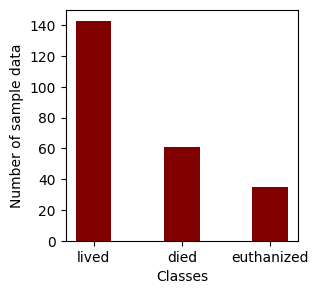

In [362]:
plotBarChart(classes, y_train)

In [363]:
dtree_model_1 = DecisionTreeClassifier()
dtree_gscv_1 = GridSearchCV(dtree_model_1, param_grid, cv=cv)
dtree_gscv_1.fit(X_train, y_train)
dtree_gscv_1.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [364]:
dtree_gscv_1.best_score_

0.6777173913043478

In [365]:
model_1 = dtree_gscv_1.best_estimator_

[Text(0.5431034482758621, 0.9, 'x[17] <= 8.85\nentropy = 1.352\nsamples = 239\nvalue = [143, 61, 35]'),
 Text(0.27586206896551724, 0.7, 'x[16] <= 52.5\nentropy = 1.329\nsamples = 175\nvalue = [97, 61, 17]'),
 Text(0.13793103448275862, 0.5, 'x[20] <= 1.5\nentropy = 1.234\nsamples = 136\nvalue = [89, 33, 14]'),
 Text(0.06896551724137931, 0.3, 'x[0] <= 0.5\nentropy = 1.421\nsamples = 90\nvalue = [47, 30, 13]'),
 Text(0.034482758620689655, 0.1, 'entropy = 1.42\nsamples = 16\nvalue = [4, 3, 9]'),
 Text(0.10344827586206896, 0.1, 'entropy = 1.213\nsamples = 74\nvalue = [43, 27, 4]'),
 Text(0.20689655172413793, 0.3, 'x[11] <= 3.5\nentropy = 0.497\nsamples = 46\nvalue = [42, 3, 1]'),
 Text(0.1724137931034483, 0.1, 'entropy = 0.267\nsamples = 44\nvalue = [42, 2, 0]'),
 Text(0.2413793103448276, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.41379310344827586, 0.5, 'x[3] <= 102.0\nentropy = 1.097\nsamples = 39\nvalue = [8, 28, 3]'),
 Text(0.3448275862068966, 0.3, 'x[6] <= 2.0\nentr

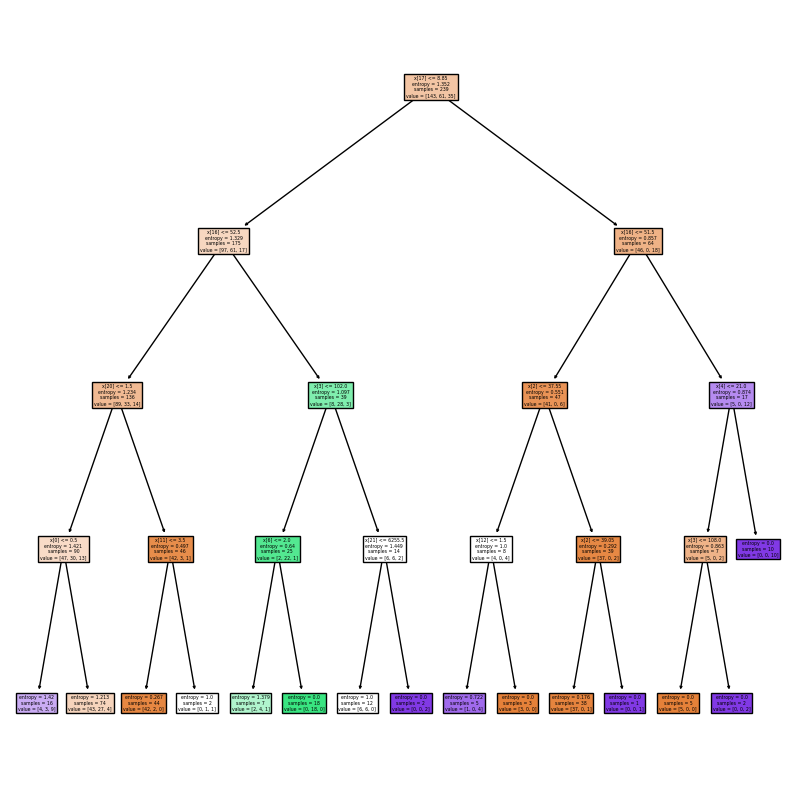

In [366]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model_1, filled=True)

In [367]:
y_pred_1 = model_1.predict(X_test)

In [368]:
report(y_pred_1, y_test, classes)

              precision    recall  f1-score   support

       lived       0.94      0.70      0.80        47
        died       0.25      0.80      0.38         5
  euthanized       0.33      0.38      0.35         8

    accuracy                           0.67        60
   macro avg       0.51      0.63      0.51        60
weighted avg       0.80      0.67      0.71        60



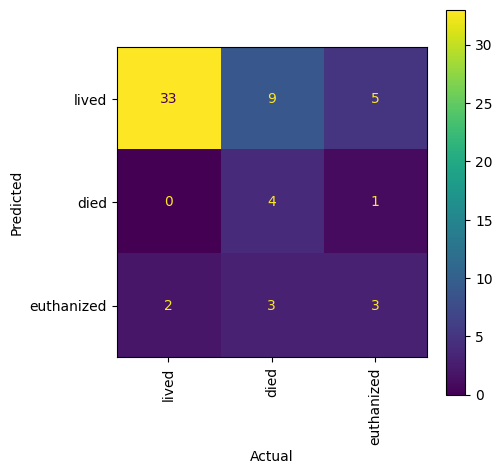

In [369]:
plotCM(y_test=y_test, y_pred=y_pred_1, labels=classes)

## สรุปการทดลองที่ 1

จากการทดลองที่ 1 จะเห็นได้ว่าประสิทธภาพของโมเดลนั้นค่อนข้างดี แต่เมื่อสังเกต confusion matrix จะพบว่าข้อมูลตัวอย่างส่วนใหญ่จะอยู่ใน class lived ซึ่งเป็นปัญหา Imbalance

# Imblance Problem

## Random sampling

In [370]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res_random,y_res_random = ros.fit_resample(X_train,y_train)

        class  value
0       lived    143
1        died    143
2  euthanized    143


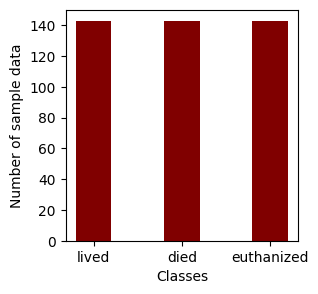

In [371]:
plotBarChart(classes, y_res_random)

In [372]:
dtree_gscv_rands = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=cv)
dtree_gscv_rands.fit(X_res_random, y_res_random)
dtree_gscv_rands.best_params_

{'criterion': 'gini', 'max_depth': 66}

In [373]:
dtree_gscv_rands.best_score_

0.9230897009966779

In [374]:
y_pred_res_rand = dtree_gscv_rands.best_estimator_.predict(X_test)

In [375]:
report(y_test, y_pred_res_rand, classes)

              precision    recall  f1-score   support

       lived       0.78      0.80      0.79        35
        died       0.60      0.56      0.58        16
  euthanized       0.44      0.44      0.44         9

    accuracy                           0.68        60
   macro avg       0.61      0.60      0.60        60
weighted avg       0.68      0.68      0.68        60



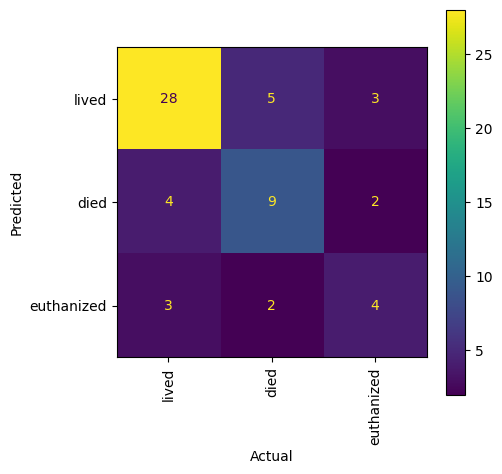

In [376]:
plotCM(y_test=y_test, y_pred=y_pred_res_rand, labels=classes)

## use oversampling using SMOTE to increase data for training set 

In [377]:
from imblearn .over_sampling import SMOTE

sm = SMOTE()
X_resampled_smote, y_resampled_smote = sm.fit_resample(X_train,y_train)

In [378]:
dtree_gscv_smote = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=cv)
dtree_gscv_smote.fit(X_resampled_smote, y_resampled_smote)
dtree_gscv_smote.best_params_

{'criterion': 'gini', 'max_depth': 62}

In [379]:
dtree_gscv_smote.best_score_

0.7785714285714286

In [380]:
y_pred_smote = dtree_gscv_smote.best_estimator_.predict(X_test)

In [381]:
report(y_pred_smote, y_test, classes)

              precision    recall  f1-score   support

       lived       0.83      0.81      0.82        36
        died       0.69      0.69      0.69        16
  euthanized       0.56      0.62      0.59         8

    accuracy                           0.75        60
   macro avg       0.69      0.71      0.70        60
weighted avg       0.75      0.75      0.75        60



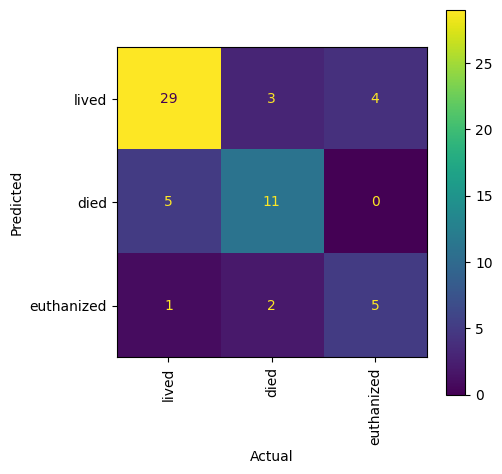

In [382]:
plotCM(y_test=y_test, y_pred=y_pred_smote, labels=classes)

## Tomek

In [383]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [384]:
tl = TomekLinks()
X_res_tomek, y_res_tomek = tl.fit_resample(X_train, y_train)

        class  value
0       lived    121
1        died     45
2  euthanized     35


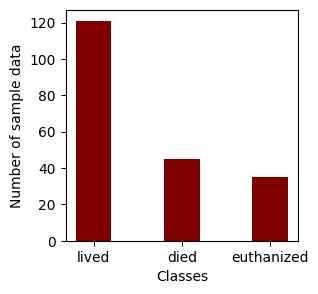

In [385]:
plotBarChart(classes, y_res_tomek)

In [386]:
dtree_gscv_tomek = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=cv)
dtree_gscv_tomek.fit(X_res_tomek, y_res_tomek)
dtree_gscv_tomek.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [387]:
dtree_gscv_tomek.best_score_

0.7011904761904763

In [388]:
y_pred_tomek = dtree_gscv_tomek.best_estimator_.predict(X_test)

In [389]:
report(y_test, y_pred_tomek, classes)

              precision    recall  f1-score   support

       lived       0.65      0.91      0.76        35
        died       0.75      0.38      0.50        16
  euthanized       0.33      0.11      0.17         9

    accuracy                           0.65        60
   macro avg       0.58      0.47      0.48        60
weighted avg       0.63      0.65      0.60        60



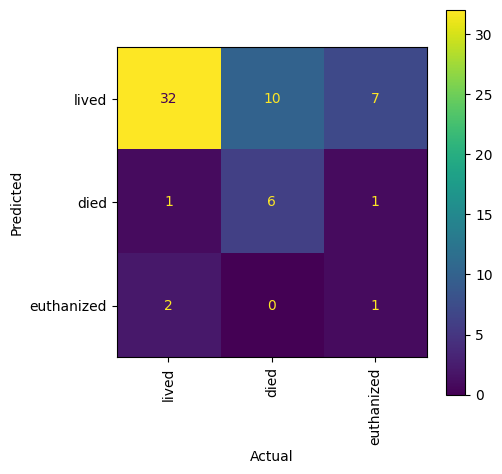

In [390]:
plotCM(y_test, y_pred_tomek, classes)

## ADASYN

In [391]:
from imblearn.over_sampling import ADASYN

In [392]:
ad = ADASYN()
X_res_adasyn, y_res_adasyn = ad.fit_resample(X_train, y_train)

        class  value
0       lived    143
1        died    146
2  euthanized    149


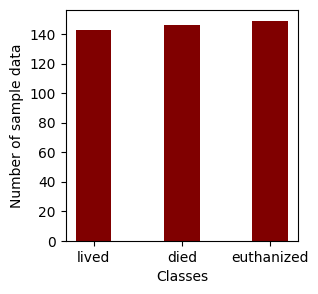

In [393]:
plotBarChart(classes, y_res_adasyn)

In [394]:
dtree_gscv_adasyn = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=cv)
dtree_gscv_adasyn.fit(X_res_adasyn, y_res_adasyn)
dtree_gscv_adasyn.best_params_

{'criterion': 'gini', 'max_depth': 18}

In [395]:
dtree_gscv_adasyn.best_score_

0.7923361522198731

In [396]:
y_pred_adasyn = dtree_gscv_adasyn.best_estimator_.predict(X_test)

In [397]:
report(y_test, y_pred_adasyn, classes)

              precision    recall  f1-score   support

       lived       0.79      0.66      0.72        35
        died       0.58      0.69      0.63        16
  euthanized       0.42      0.56      0.48         9

    accuracy                           0.65        60
   macro avg       0.60      0.63      0.61        60
weighted avg       0.68      0.65      0.66        60



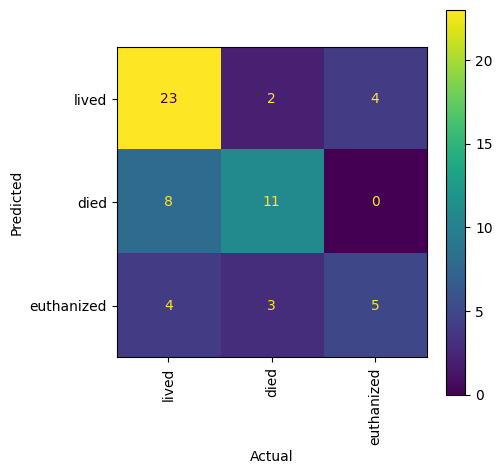

In [398]:
plotCM(y_test, y_pred_adasyn, classes)